In [ ]:
import pandas as pd
import csv

# Use csv.QUOTE_MINIMAL to only quote where necessary
# Try to read the file with error_bad_lines=False to skip problematic lines
# and see if you can identify the issue in the skipped rows
try:
    df = pd.read_csv("/content/usecase_2_.csv", quoting=csv.QUOTE_MINIMAL, escapechar='\\', on_bad_lines='skip')
    print("Successfully read the CSV with skipped lines.")
    print("Check the problematic rows (if any) by inspecting the original CSV file around row 785.")
except pd.errors.ParserError as e:
    print(f"Error: {e}")
    print("The on_bad_lines='skip' approach also failed. This likely indicates a more severe issue within the CSV file structure.")
    print("Possible solutions:")
    print("  1. Manually inspect row 785 and the surrounding rows in your CSV file for unescaped quotes or incorrect line endings.")
    print("  2. If you have control over the CSV generation process, ensure proper escaping of quotes and consistent line endings.")
    print("  3. Try using a different text editor to open the CSV file and check for any hidden characters or encoding issues.")
    print("  4. If the file is large, consider processing it in smaller chunks to identify the specific area causing the problem.")
# escapechar is used to escape special characters (like quotes) within the fields.
# Using backslash here is a common choice.

<ipython-input-1-8174d4ba0823>:8: DtypeWarning: Columns (0,18,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,2

Successfully read the CSV with skipped lines.
Check the problematic rows (if any) by inspecting the original CSV file around row 785.


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
print(df.head())

    NCT Number                                        Study Title  \
0  NCT04841499  Effects of a Seven-day BASIS™ Supplementation ...   
1  NCT03020641          Peritoneal Damage in Laparoscopic Surgery   
2  NCT03727620  Doxycycline in the Treatment of Aggressive Per...   
3  NCT03162926  A Safety and Tolerability Study of VC-02™ Comb...   
4  NCT04434313  Treatment of Hemiparetic Gait Impairments Usin...   

                                      Study URL Acronym Study Status  \
0  https://clinicaltrials.gov/study/NCT04841499     NaN    COMPLETED   
1  https://clinicaltrials.gov/study/NCT03020641     NaN    COMPLETED   
2  https://clinicaltrials.gov/study/NCT03727620     NaN    COMPLETED   
3  https://clinicaltrials.gov/study/NCT03162926     NaN    COMPLETED   
4  https://clinicaltrials.gov/study/NCT04434313     NaN    COMPLETED   

                                       Brief Summary Study Results  \
0  The purpose of this study is to determine whet...            NO   
1  The inves

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
print(df.dtypes)

Study Title                   object
Study URL                     object
Acronym                       object
Study Status                  object
Brief Summary                 object
Study Results                 object
Conditions                    object
Interventions                 object
Primary Outcome Measures      object
Secondary Outcome Measures    object
Other Outcome Measures        object
Sponsor                       object
Collaborators                 object
Sex                           object
Age                           object
Phases                        object
Enrollment                    object
Funder Type                   object
Study Type                    object
Study Design                  object
Other IDs                     object
Locations                     object
Study Documents               object
Time taken for Enrollment     object
dtype: object


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab data

# Define the columns to process
text_columns = [
    'Study Title', 'Study Status', 'Brief Summary', 'Study Results',
    'Conditions', 'Interventions', 'Primary Outcome Measures',
    'Funder Type', 'Study Type', 'Study Design', 'Locations'
]

# Define a function to preprocess text (remove prepositions and stopwords)
def preprocess_text(text):
    if pd.isnull(text):
        return text  # Skip processing for NaN values
    # Tokenize and remove punctuation
    words = word_tokenize(re.sub(r'[^\w\s]', '', text.lower()))
    # Remove stopwords (including prepositions)
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(filtered_words)

# Apply preprocessing to specified columns
for column in text_columns:
    if column in df.columns:
        df[column] = df[column].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
print(df.head)

<bound method NDFrame.head of                                             Study Title  \
0     effects sevenday basis supplementation menopau...   
1                peritoneal damage laparoscopic surgery   
2        doxycycline treatment aggressive periodontitis   
3     safety tolerability study vc02 combination pro...   
4     treatment hemiparetic gait impairments using t...   
...                                                 ...   
3098  comparative effectiveness costeffectiveness ch...   
3099  impact intestinal microbiota treatment ceftria...   
3100                               mental balance study   
3101       glymphatic kinetics healthy adult volunteers   
3102  utilizing mychart assess effectiveness interve...   

                                         Study URL    Acronym Study Status  \
0     https://clinicaltrials.gov/study/NCT04841499        NaN    completed   
1     https://clinicaltrials.gov/study/NCT03020641        NaN    completed   
2     https://clinicaltrial

In [ ]:
import nltk
nltk.download('wordnet') # Download the wordnet dataset

from nltk.corpus import wordnet

# ... (Rest of your code)

# Function to expand synonyms for a given word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

# Function to expand synonyms in a text
def synonym_expansion(text):
    if pd.isnull(text):
        return text  # Skip processing for NaN values
    words = text.split()  # Split the cleaned text into words
    expanded_text = []
    for word in words:
        expanded_text.append(word)  # Add the original word
        expanded_text.extend(get_synonyms(word))  # Add synonyms
    return ' '.join(set(expanded_text))  # Deduplicate and join back to a string

# Apply synonym expansion to the same text columns
for column in text_columns:
    if column in df.columns:
        df[column] = df[column].apply(synonym_expansion)




[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
label_columns = ['Sex', 'Age', 'Phases', 'Enrollment']

# Initialize a dictionary to store encoders for each column (optional: for inverse transformations later)
label_encoders = {}

# Apply label encoding to each specified column
for column in label_columns:
    if column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))  # Ensure all data is treated as string
        label_encoders[column] = le

In [ ]:
columns_to_check = [
    'Sex', 'Age', 'Phases', 'Enrollment', 'Study Title', 'Study Status', 'Brief Summary',
    'Study Results', 'Conditions', 'Interventions', 'Primary Outcome Measures',
    'Funder Type', 'Study Type', 'Study Design', 'Locations', 'Time taken for Enrollment'
]

# Filter rows where all specified columns have non-null values
filtered_df = df.dropna(subset=columns_to_check)

# Select the top 1000 rows
top_1000_rows = filtered_df.head(1000)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the PubMedBERT model and tokenizer
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to generate embeddings
def generate_embedding(text, tokenizer, model):
    if pd.isna(text) or text.strip() == "":  # Handle empty or NaN values
        return torch.zeros(768).tolist()  # Return a zero vector if the text is empty
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().tolist()  # Mean pooling of embeddings

# Columns to process
text_columns = [
    'Study Title', 'Study Status', 'Brief Summary', 'Study Results',
    'Conditions', 'Interventions', 'Primary Outcome Measures',
    'Funder Type', 'Study Type', 'Study Design', 'Locations'
]

# Generate embeddings for each column using PubMedBERT
for col in text_columns:
    print(f"Generating embeddings for column: {col} using PubMedBERT")
    top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(
        lambda x: generate_embedding(x, tokenizer, model)
    )


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating embeddings for column: Study Title using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Study Status using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Brief Summary using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Study Results using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Conditions using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Interventions using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Primary Outcome Measures using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Funder Type using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Study Type using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Study Design using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


Generating embeddings for column: Locations using PubMedBERT


<ipython-input-11-7092d7125584>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"{col}_embedding"] = top_1000_rows[col].apply(


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

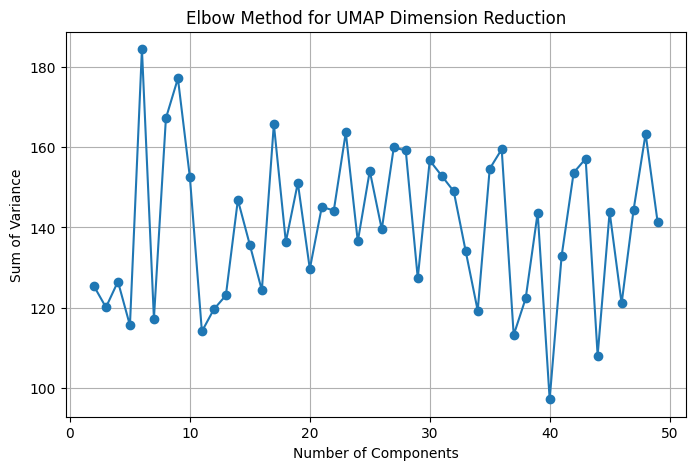

In [ ]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np

# Combine all embedding columns into a single DataFrame
embedding_columns = [f"{col}_embedding" for col in [
    'Study Title', 'Study Status', 'Brief Summary', 'Study Results',
    'Conditions', 'Interventions', 'Primary Outcome Measures',
    'Funder Type', 'Study Type', 'Study Design', 'Locations'
]]

# Flatten embeddings into a single numpy array
embedding_data = np.vstack(
    top_1000_rows[embedding_columns].apply(
        lambda row: np.concatenate(row.values), axis=1
    )
)

# Use pairwise distances for elbow method
distances = pairwise_distances(embedding_data, metric='euclidean')

# Find optimal dimensions for UMAP using the elbow method
inertia = []
dimensions = range(2, 50)  # Test dimensions from 2 to 50
for dim in dimensions:
    umap_reducer = umap.UMAP(n_components=dim, random_state=42)
    transformed = umap_reducer.fit_transform(embedding_data)
    inertia.append(np.sum(np.var(transformed, axis=0)))  # Variance in reduced dimensions

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(dimensions, inertia, marker='o')
plt.title("Elbow Method for UMAP Dimension Reduction")
plt.xlabel("Number of Components")
plt.ylabel("Sum of Variance")
plt.grid()
plt.show()

In [ ]:
optimal_dims = 40  # Example, replace with the value from the plot

# Apply UMAP with optimal dimensions
umap_reducer = umap.UMAP(n_components=optimal_dims, random_state=42)
reduced_embeddings = umap_reducer.fit_transform(embedding_data)

# Add reduced embeddings back to the DataFrame
for i in range(optimal_dims):
    top_1000_rows[f"UMAP_{i+1}"] = reduced_embeddings[:, i]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-14-de94449a2449>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_rows[f"UMAP_{i+1}"] = reduced_embeddings[:, i]
<ipython-input-14-de94449a2449>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Prepare features and target
# Select relevant columns
input_columns = [
    'Sex', 'Age', 'Phases', 'Enrollment',
    'Study Title', 'Study Status', 'Brief Summary', 'Study Results',
    'Conditions', 'Interventions', 'Primary Outcome Measures',
    'Funder Type', 'Study Type', 'Study Design'
]

target_column = 'Time taken for Enrollment'

# Ensure the columns exist in the dataframe after UMAP processing
input_data = top_1000_rows[input_columns]
target_data = top_1000_rows[target_column]

# Step 2: Preprocess data
# Handling categorical features using one-hot encoding and scaling
# Columns for one-hot encoding
categorical_columns = ['Sex', 'Age', 'Phases', 'Enrollment']

# Scale numerical features (UMAP embeddings)
scaler = StandardScaler()

# Identify numerical columns (excluding categorical and text columns)
numerical_columns = [col for col in input_columns if col not in categorical_columns and col not in text_columns]

# Ensure all columns are of numeric type before applying preprocessing
# Convert to numeric, replacing non-numeric values with NaN
for col in categorical_columns + numerical_columns:
    input_data[col] = pd.to_numeric(input_data[col], errors='coerce')

# Impute NaN values if any (you can use a different strategy if needed)
input_data = input_data.fillna(0)

# Column transformer to apply one-hot encoding to categorical columns and scaling to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns),
        ('num', scaler, numerical_columns)
    ])

# Apply the preprocessor to the input data
X = preprocessor.fit_transform(input_data)

# For the target, make sure it's in a numeric format
y = target_data.values
y = pd.to_numeric(y, errors='coerce')

# Impute NaN values if any (you can use a different strategy if needed)
y = np.nan_to_num(y)  # Replace NaN with 0
# --- End of the code to insert ---


# Step 3: Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-26-207c951d05e0>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = pd.to_numeric(input_data[col], errors='coerce')


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

# Step 4: Build the BiLSTM model
bi_lstm_model = Sequential()

# Input layer: BiLSTM expects 3D input (samples, time steps, features)
# Reshaping input to (samples, time steps, features)
bi_lstm_model.add(tf.keras.layers.Reshape((1, X_train.shape[1]), input_shape=(X_train.shape[1],)))

# BiLSTM layer with 64 units
bi_lstm_model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))

# Dropout layer to prevent overfitting
bi_lstm_model.add(Dropout(0.2))

# Output layer: predicting a continuous value (Time taken for Enrollment)
bi_lstm_model.add(Dense(1))

# Step 5: Compile the BiLSTM model
bi_lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 6: Train the BiLSTM model
bi_lstm_history = bi_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions with the BiLSTM model and evaluate the RMSE
y_pred_bilstm = bi_lstm_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) for BiLSTM model
rmse_bilstm = np.sqrt(mean_squared_error(y_test, y_pred_bilstm))
print(f"RMSE for BiLSTM: {rmse_bilstm}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 667.7067 - val_loss: 609.3492
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 617.5209 - val_loss: 591.2498
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 561.6722 - val_loss: 557.8972
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 528.3793 - val_loss: 507.4259
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 455.1757 - val_loss: 443.5311
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 386.5001 - val_loss: 378.3217
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 335.8933 - val_loss: 329.0683
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 278.2339 - val_loss: 300.2128
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 305.0649 - val_loss: 287.5830
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 273.1591 - val_loss: 280.5639
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 234.1577 - val_loss: 276.5512
Epoch 12/50
25/25 ━━

In [ ]:
model = Sequential()

# Input layer: RNN expects 3D input (samples, time steps, features)
# Here, we'll use a single time step (1) for each sample (flatten the data to time steps)
model.add(tf.keras.layers.Reshape((1, X_train.shape[1]), input_shape=(X_train.shape[1],)))

# RNN layer with 64 units
model.add(SimpleRNN(64, activation='relu', return_sequences=False))

# Dropout layer to prevent overfitting
model.add(Dropout(0.3))

# Output layer: predicting a continuous value (Time taken for Enrollment)
model.add(Dense(1))

# Step 5: Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 579.7545 - val_loss: 598.7670
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 541.1518 - val_loss: 571.0222
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 532.0207 - val_loss: 529.2407
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 454.2565 - val_loss: 477.3809
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 415.7916 - val_loss: 424.5004
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 452.6029 - val_loss: 376.9656
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 358.6606 - val_loss: 340.9701
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 310.2562 - val_loss: 314.1212
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 305.6849 - val_loss: 297.5801
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 249.7126 - val_loss: 288.5488
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 230.8337 - val_loss: 281.9182
Epoch 12/50
25/25 ━━━━━━━━━━